# <p style="text-align: center;">AT-TPC Report

 ### <p style="text-align: right;">Authors:
<p style="text-align: right;">Ceulemans Andreas, Fracassetti Stefano, Youssef Ahmed
    

![Active Target](img/AT_drawing.png)

In [2]:
# Common import

import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import h5py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, 
                             matthews_corrcoef, roc_curve, roc_auc_score, classification_report)

from helper_functions import *

np.random.seed(42)

# Description of the Project:


### Task
The main objective is to classify events aquired from an Active Target (simulated data), as being "beam" or "reaction" events. The idea is to implement a "software trigger" which would be able to effectively select only relevant data to save on disk for future analysis.

### Data Format
Data are saved in the file "Mg22_alphaalpha_digiSim.h5", which contains 2000 simulated events: even numbers are "reaction" events, while odd numbers are "beam" event.<br>
Each event is constitued by a point cloud of the active pads for that event.<br>
In turn, every hit pad is associated with a 4-tuple (x,y,z,q): x and y are the position of the hit pad on the detector plane, z is the coordinare associated to the beam axis, and q is the charge deposited on the pad.<br> 
Actually, there is an extra column associated with time (not needed since data already contains the z coordinate thanks to a pre-processing phase), and also an extra column of zeros, unnecessary for this analysis.<br>
The number of hit pads may vary for each event, ranging from around 20, up to a few hundred.

### Strategy
We will apply the ML techiques learned during the Talent Course, in order to analyse the data and reach the best performance possible.<br>
First there will be a section dedicated to data visualization, and in which we will discuss the general characteristic of the task. Afterwards, we will propose various approaches to tackle to problem, and show the results for each methods. Eventually, we will summarize and discuss the outcomes in the final section.

Models used in this project:
- Logistic Regression
- Random Forest
- Dense Neural Networks (DNN)
- K-Means
- Support Vector Machine (SVM)

# Data Visualization


## Loading the Dataset

The first step in machine learning problems is loading the dataset and transforming its contents into
a useful format for processing.
In this github repository the data set is contained in the file "Mg22_alphaalpha_digiSim.h5", 
which is located in the "DataFiles" folder.

In [10]:
#Open the data file
data_file='./DataFiles/Mg22_alphaalpha_digiSim.h5'
f=h5py.File(data_file, 'r')

#### Labeling and cleaning the data
Next, the data is unpacked into two arrays which contain the data and the labels respectively. AllData contains a list of events, with for each event an array with entries. Labels is an array filled with a value 0 (beam) or 1 (reaction) for each event. 

In [11]:
AllData, Labels = load_data(f)

Dataset contains 2000 events
Dataset contains 1995 non-empty events


The load_data method also filters out the empty events. <br>
As the output above displays, there were five empty events, leaving 1995 events to be used during the analysis.

#### Splitting the data
Before starting, the dataset is split into training, validation and testing subsets. This is done by selecting indices for each set (as seen in Geir's notebooks).

In [12]:
x_idx = np.arange(len(AllData))
trainval_idx, test_idx, not_used1, not_used2 = train_test_split(x_idx, x_idx, test_size = 0.10)
train_idx, val_idx, not_used3, not_used4 = train_test_split(trainval_idx, trainval_idx, test_size = 0.10)
print("Dataset was divided into " + str(len(train_idx)) + " training events, " + 
      str(len(val_idx)) + " validation events and " + str(len(test_idx)) + " test events")

Dataset was divided into 1615 training events, 180 validation events and 200 test events


## Event Visualization

Some events are plotted to give us some insight in the differences between beam and reaction events. They are displayed in 3d using (x,y,z) coordinates. Each point corresponds to one pad fired.

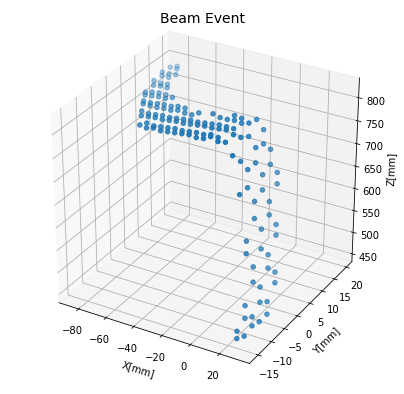

886

In [18]:

some_training_events = train_idx[0:1]
for i in range (len(some_training_events)):
    plot_3d_event(AllData,Labels,some_training_events[i])
train_idx[0]

# Machine Learning

# Conclusions